In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

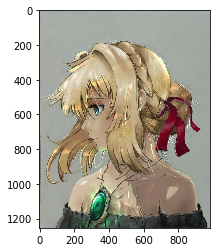

In [2]:
img = cv2.imread("violet_evergreen.jpg")
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img = np.array(img)
im_height , im_width = img.shape[0] , img.shape[1]
img = img.reshape(-1 , 3)
img = img/255

In [4]:
def KMeans(X , n_means , n_iter):
    centroids = X[np.random.choice(X.shape[0] , size = n_means , replace = False)]
    loss = np.zeros(n_iter)

    for i in range(n_iter):
        
        # Assigning Centroids
        distance = np.linalg.norm(X - centroids[: , np.newaxis] , axis = 2)
        assigned_centroids = np.argmin(distance , axis = 0)
        
        # Calculating new means
        means = []
        for k in range(n_means):
            means.append(X[assigned_centroids == k].mean(axis = 0))
        means = np.asarray(means)
        
        # Error error = np.linalg.norm(centroids-means,1,1).sum()
        error = np.linalg.norm(centroids - means , ord = 1 , axis = 1).sum()
        loss[i] = error
        
        centroids = means
    
    distance = np.linalg.norm(X - centroids[: , np.newaxis] , axis = 2)
    assigned_centroids = np.argmin(distance , axis = 0)
    plt.plot(loss)
    
    return centroids , distance , assigned_centroids

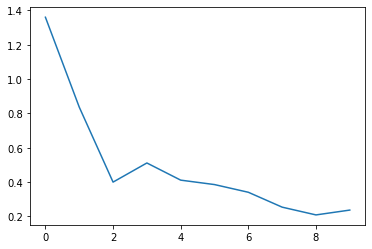

In [5]:
centroids , distance , assigned_centroids = KMeans(img , 16 , 10)

In [6]:
# Assign RGB values to each pixel according to its corrosponding centroid
for k in range(centroids.shape[0]):
    img[assigned_centroids == k] = centroids[k]*255

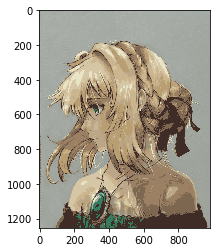

In [7]:
img = img.astype("uint8")
img = img.reshape(im_height , im_width , 3)
plt.imshow(img)

In [8]:
compressed_im = Image.fromarray(img)
compressed_im.save("violet_evergreen_compressed.jpeg")